## MOVIE REVENUE PREDICTION Model using Linear Regression

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
# Step 1: Load the Dataset
df = pd.read_csv("movie_revenue_noisy_dataset.csv")

In [4]:
df

,budget,genre,director_popularity,actor_1_popularity,actor_2_popularity,runtime,release_month,critic_score,marketing_budget,franchise,revenue
0,5.643984e+07,Comedy,8.035501,6.646810,1.982077,101.072554,9.0,71.333967,2.996166e+06,1.0,2.776660e+08
1,2.058446e+08,Action,6.613897,3.455737,7.998456,165.252268,12.0,20.190102,1.684365e+06,0.0,6.838562e+08
2,1.105406e+08,Comedy,5.971848,4.251574,NaN,147.337043,7.0,88.717036,3.789570e+06,1.0,7.249820e+08
3,1.325375e+08,Sci-Fi,5.634020,7.565619,8.357837,120.552490,3.0,34.706573,4.497234e+06,0.0,4.685215e+08
4,1.552311e+08,Drama,7.323209,1.521914,8.326148,91.645751,7.0,26.793159,1.176841e+06,0.0,2.197319e+08
...,...,...,...,...,...,...,...,...,...,...,...
895,1.425784e+08,Comedy,2.037428,1.649762,7.964764,NaN,3.0,8.343507,4.622524e+06,0.0,3.398029e+07
896,1.108417e+08,Drama,3.018233,6.086808,8.297890,123.664118,10.0,58.753033,4.769574e+06,1.0,1.110181e+09
897,1.665334e+08,Horror,1.172002,5.968270,7.901365,91.086729,12.0,49.214963,1.532360e+06,1.0,3.956448e+08
898,7.289115e+07,Sci-Fi,5.096842,6.008602,8.014854,197.252981,6.0,26.722578,3.211439e+06,1.0,4.678691e+08


In [5]:
df.isnull().sum()

budget                 45
genre                  45
director_popularity    45
actor_1_popularity     45
actor_2_popularity     45
runtime                45
release_month          45
critic_score           45
marketing_budget       45
franchise              45
revenue                45
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   budget               855 non-null    float64
 1   genre                855 non-null    object 
 2   director_popularity  855 non-null    float64
 3   actor_1_popularity   855 non-null    float64
 4   actor_2_popularity   855 non-null    float64
 5   runtime              855 non-null    float64
 6   release_month        855 non-null    float64
 7   critic_score         855 non-null    float64
 8   marketing_budget     855 non-null    float64
 9   franchise            855 non-null    float64
 10  revenue              855 non-null    float64
dtypes: float64(10), object(1)
memory usage: 77.5+ KB


In [7]:
df.shape

(900, 11)

In [8]:
df.describe()

,budget,director_popularity,actor_1_popularity,actor_2_popularity,runtime,release_month,critic_score,marketing_budget,franchise,revenue
count,8.550000e+02,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,8.550000e+02,855.000000,8.550000e+02
mean,1.005673e+08,5.538555,5.484487,5.472203,129.735960,6.374269,51.975992,2.535759e+06,0.507602,4.898166e+08
std,5.835588e+07,2.660184,2.702047,2.647628,32.274932,3.429148,28.692621,1.419384e+06,0.500235,2.961415e+08
min,1.036948e+06,0.858447,0.820019,0.866200,64.062987,1.000000,0.828491,5.002606e+04,0.000000,5.696647e+06
25%,5.092535e+07,3.138243,3.225940,3.195089,102.215523,3.000000,28.109698,1.378316e+06,0.000000,2.341490e+08
50%,9.989109e+07,5.654656,5.384490,5.403486,126.187928,6.000000,52.609644,2.541731e+06,1.000000,4.863984e+08
75%,1.483027e+08,7.549615,7.590473,7.686417,156.078647,9.000000,74.328700,3.725585e+06,1.000000,7.365300e+08
max,2.493029e+08,11.932847,12.284501,11.644285,220.534506,12.000000,120.236118,5.864346e+06,1.000000,1.110181e+09


In [9]:
df.head()

,budget,genre,director_popularity,actor_1_popularity,actor_2_popularity,runtime,release_month,critic_score,marketing_budget,franchise,revenue
0,5.643984e+07,Comedy,8.035501,6.646810,1.982077,101.072554,9.0,71.333967,2.996166e+06,1.0,2.776660e+08
1,2.058446e+08,Action,6.613897,3.455737,7.998456,165.252268,12.0,20.190102,1.684365e+06,0.0,6.838562e+08
2,1.105406e+08,Comedy,5.971848,4.251574,NaN,147.337043,7.0,88.717036,3.789570e+06,1.0,7.249820e+08
3,1.325375e+08,Sci-Fi,5.634020,7.565619,8.357837,120.552490,3.0,34.706573,4.497234e+06,0.0,4.685215e+08
4,1.552311e+08,Drama,7.323209,1.521914,8.326148,91.645751,7.0,26.793159,1.176841e+06,0.0,2.197319e+08


In [10]:
df.tail()

,budget,genre,director_popularity,actor_1_popularity,actor_2_popularity,runtime,release_month,critic_score,marketing_budget,franchise,revenue
895,1.425784e+08,Comedy,2.037428,1.649762,7.964764,NaN,3.0,8.343507,4.622524e+06,0.0,3.398029e+07
896,1.108417e+08,Drama,3.018233,6.086808,8.297890,123.664118,10.0,58.753033,4.769574e+06,1.0,1.110181e+09
897,1.665334e+08,Horror,1.172002,5.968270,7.901365,91.086729,12.0,49.214963,1.532360e+06,1.0,3.956448e+08
898,7.289115e+07,Sci-Fi,5.096842,6.008602,8.014854,197.252981,6.0,26.722578,3.211439e+06,1.0,4.678691e+08
899,8.928011e+07,Sci-Fi,3.638610,6.908113,4.695873,NaN,4.0,93.201912,3.933399e+06,1.0,5.751156e+08


In [11]:
# Step 2: Preprocess the Data
# Select only numeric columns for visualization and modeling
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

In [12]:
# Check if the dataset has a target column
if 'target' not in df_numeric.columns:
    print("No 'target' column found. Creating a synthetic target column...")
    # Create a synthetic target column as a combination of existing features
    df_numeric['target'] = df_numeric.mean(axis=1) + np.random.normal(0, 5, size=len(df_numeric))

No 'target' column found. Creating a synthetic target column...


In [13]:
# Step 3: Data Cleaning (Handle Null Values)
# Impute missing values with the mean for numeric columns
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

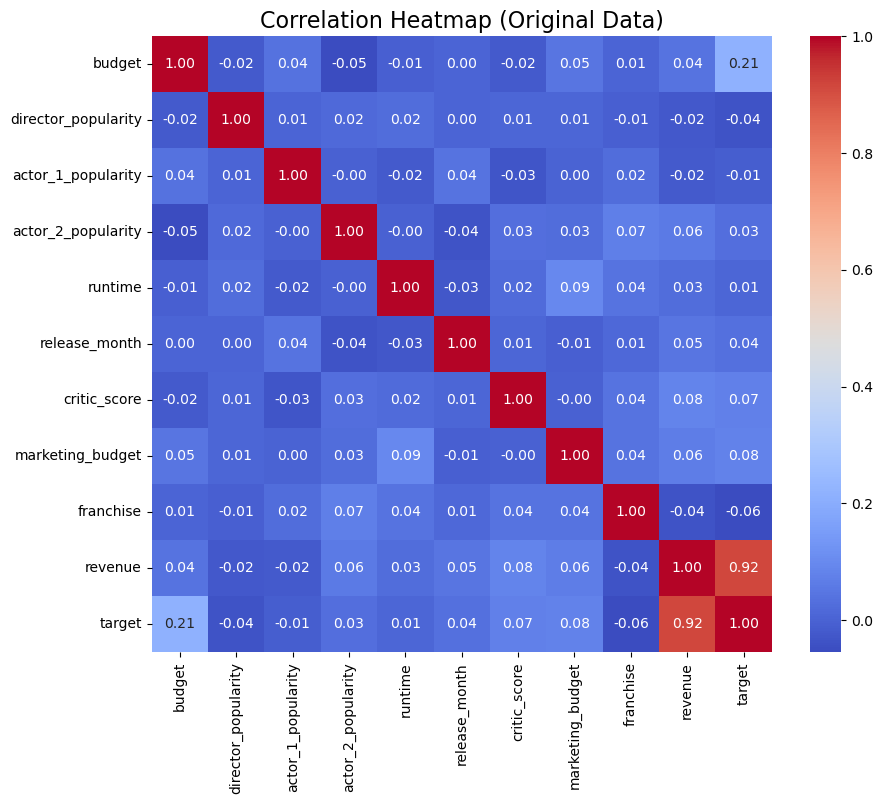

In [14]:
# Step 4: Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric_imputed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Original Data)", fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

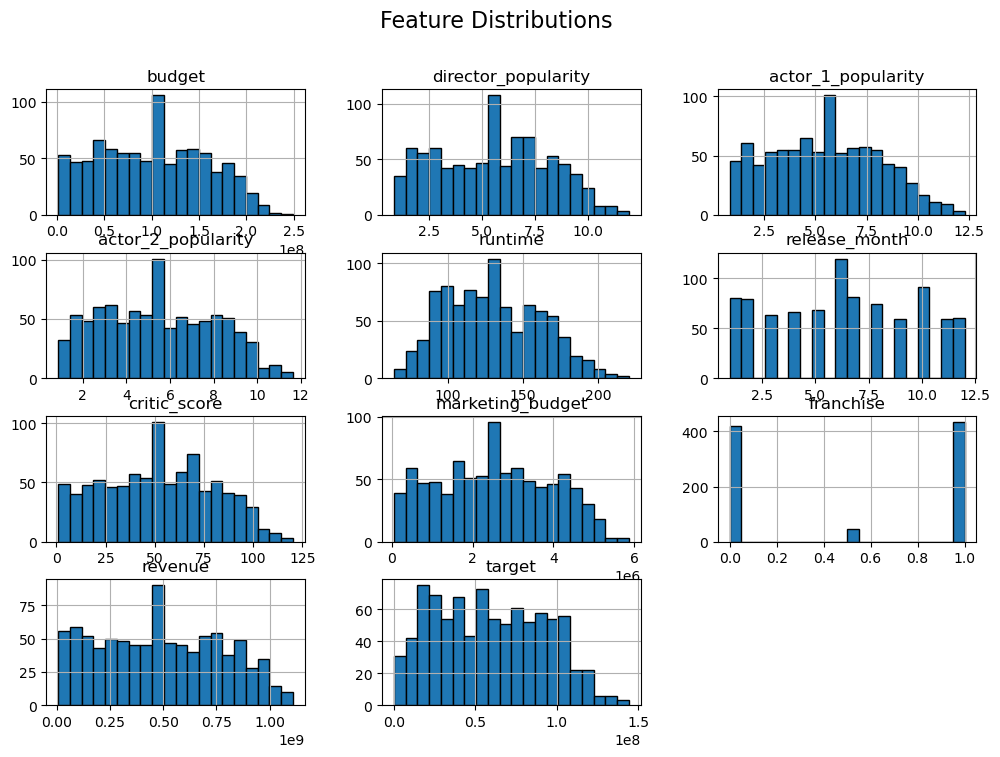

In [15]:
# Step 5: Visualize the Dataset
# Histogram for all numeric features
plt.figure(figsize=(12, 8))
df_numeric_imputed.hist(bins=20, edgecolor='black', figsize=(12, 8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

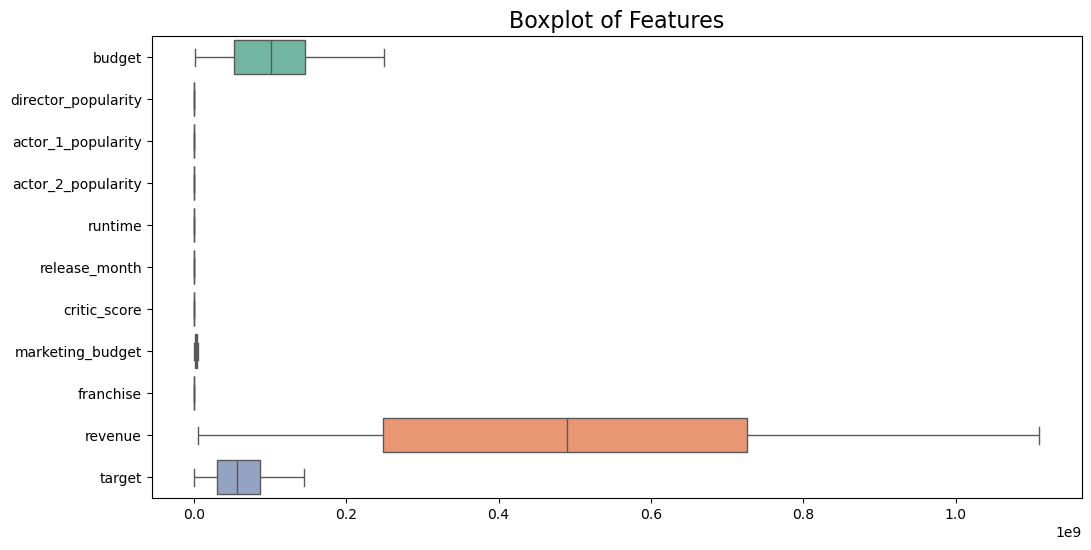

In [16]:
# Boxplot for outlier detection in numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric_imputed, orient="h", palette="Set2")
plt.title("Boxplot of Features", fontsize=16)
plt.show()

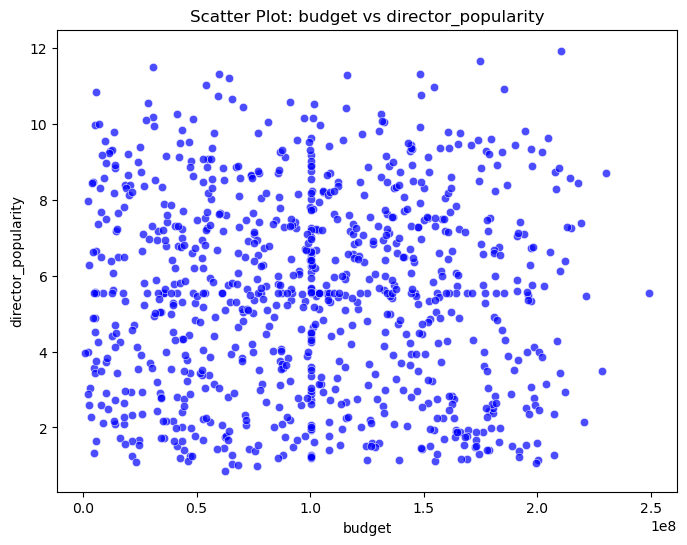

In [17]:
# Scatter plot between two features (example: first two columns)
if df_numeric_imputed.shape[1] > 1:  # Ensure at least two columns exist for scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=df_numeric_imputed.iloc[:, 0],
        y=df_numeric_imputed.iloc[:, 1],
        alpha=0.7,
        color="blue"
    )
    plt.title(f"Scatter Plot: {df_numeric_imputed.columns[0]} vs {df_numeric_imputed.columns[1]}")
    plt.xlabel(df_numeric_imputed.columns[0])
    plt.ylabel(df_numeric_imputed.columns[1])
    plt.show()

In [18]:
# Step 6: Scaling the Data
scaler = StandardScaler()
features = df_numeric_imputed.drop('target', axis=1)  # Exclude the target column for scaling
features_scaled = scaler.fit_transform(features)

In [19]:
# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['target'] = df_numeric_imputed['target']


In [20]:
# Step 7: Split Data into Training and Testing Sets
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Step 8: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [22]:
# Evaluate Linear Regression
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print("Linear Regression Mean Squared Error:", linear_mse)
print("Linear Regression R-squared Score:", linear_r2)

Linear Regression Mean Squared Error: 216539114429369.66
Linear Regression R-squared Score: 0.7907990077238962


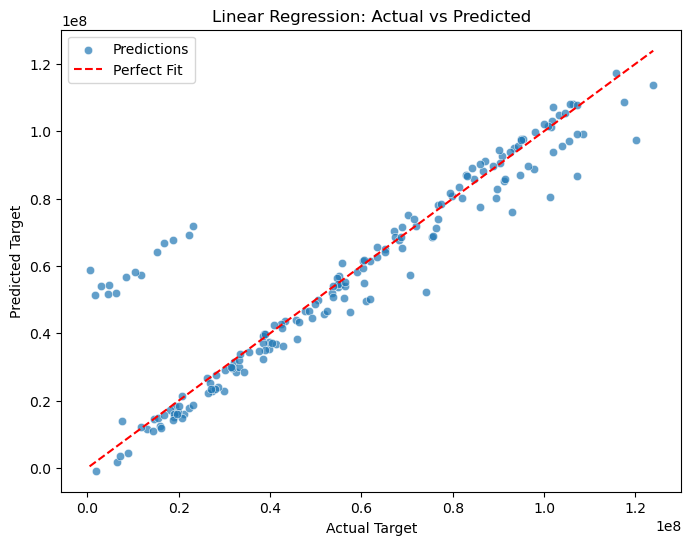

In [23]:
# Step 9: Visualize Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=linear_predictions, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

## Thank You